In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

from pathlib import Path
from pprint import pprint

from tqdm.notebook import tqdm, trange

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import fish

In [2]:
NOTEBOOK_NAME = "_template"

HERE = Path.cwd().absolute()
DATA = HERE.parent / "data"
OUT = HERE / "out" / Path(NOTEBOOK_NAME).stem
print(HERE)
print(DATA)
print(OUT)

D:\projects\fish\dev
D:\projects\fish\data
D:\projects\fish\dev\out\_template


In [3]:
frames = fish.read(DATA / "D1-6.hsv")[100:]
frames.shape

Reading frames from D:\projects\fish\data\D1-6.hsv: 100%|██████████| 1817/1817 [00:22<00:00, 79.95it/s]


(1717, 1024, 1280)

In [4]:
bsub = fish.train_background_subtractor(frames, iterations = 1)

Training background model (iteration 1): 100%|██████████| 1717/1717 [00:24<00:00, 70.45it/s]


D:\projects\fish\fish\figs.py:20: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


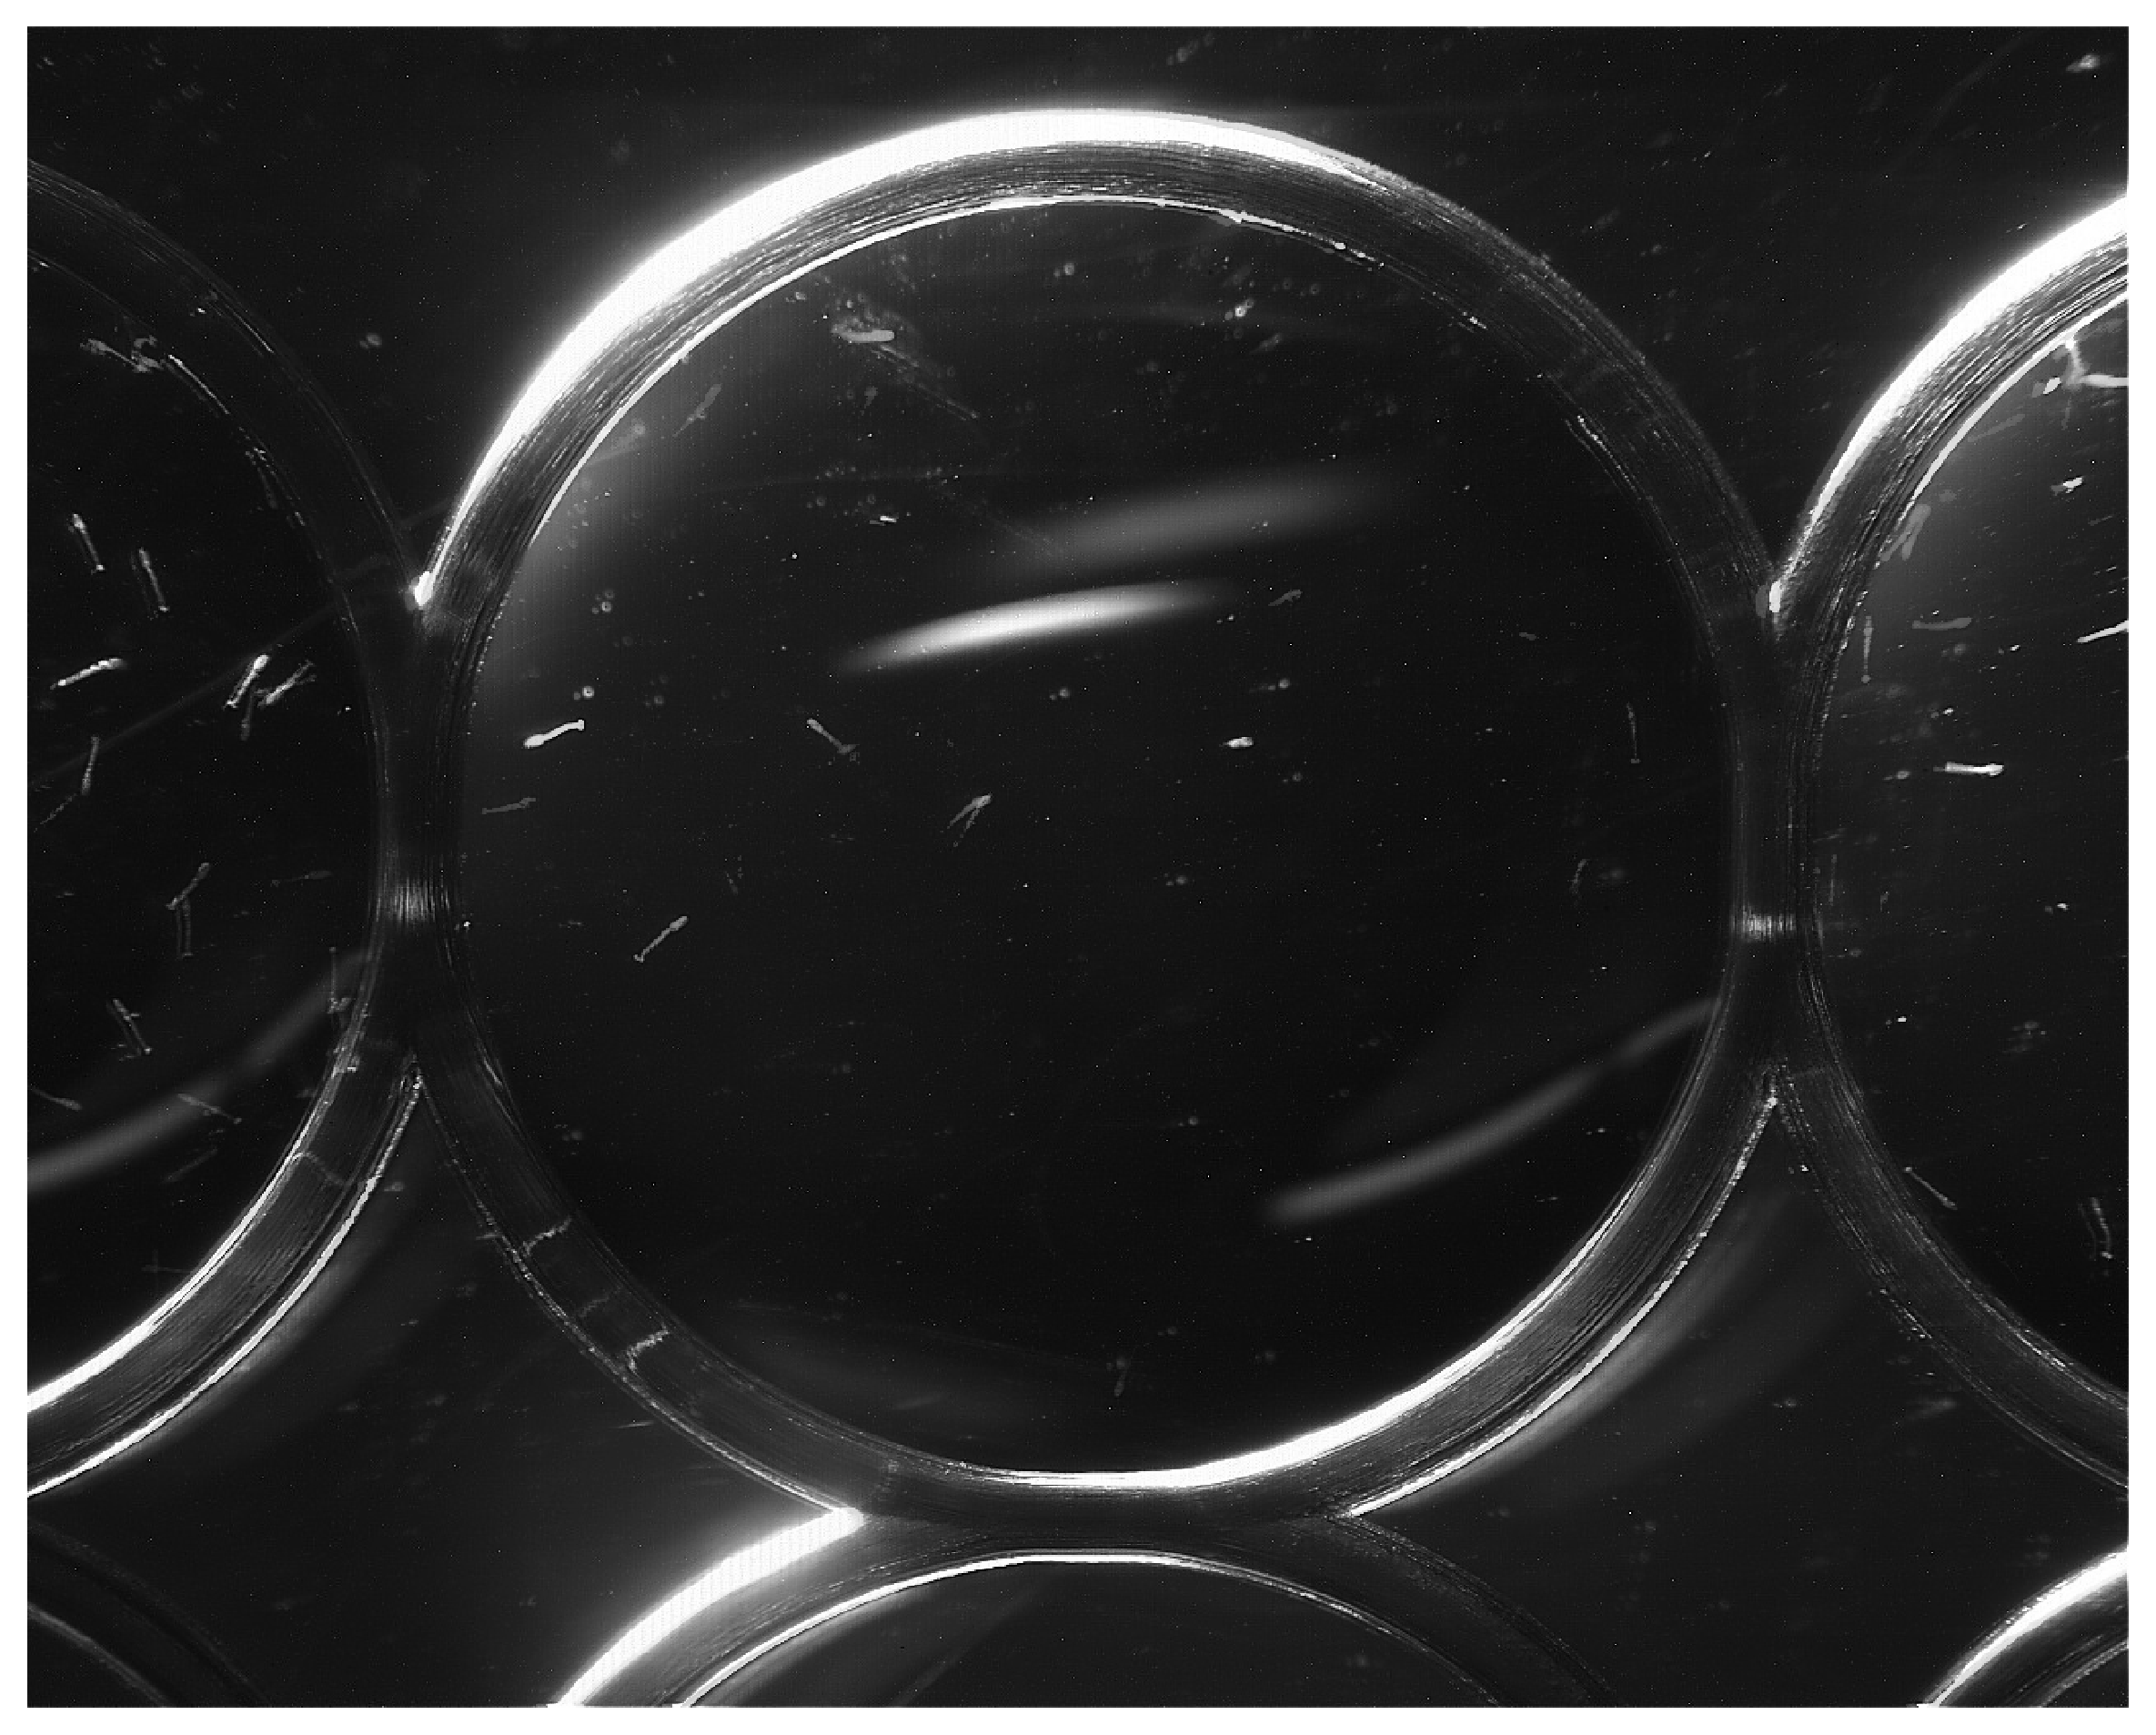

In [5]:
bgnd = bsub.getBackgroundImage()
fish.show_frame(bgnd)

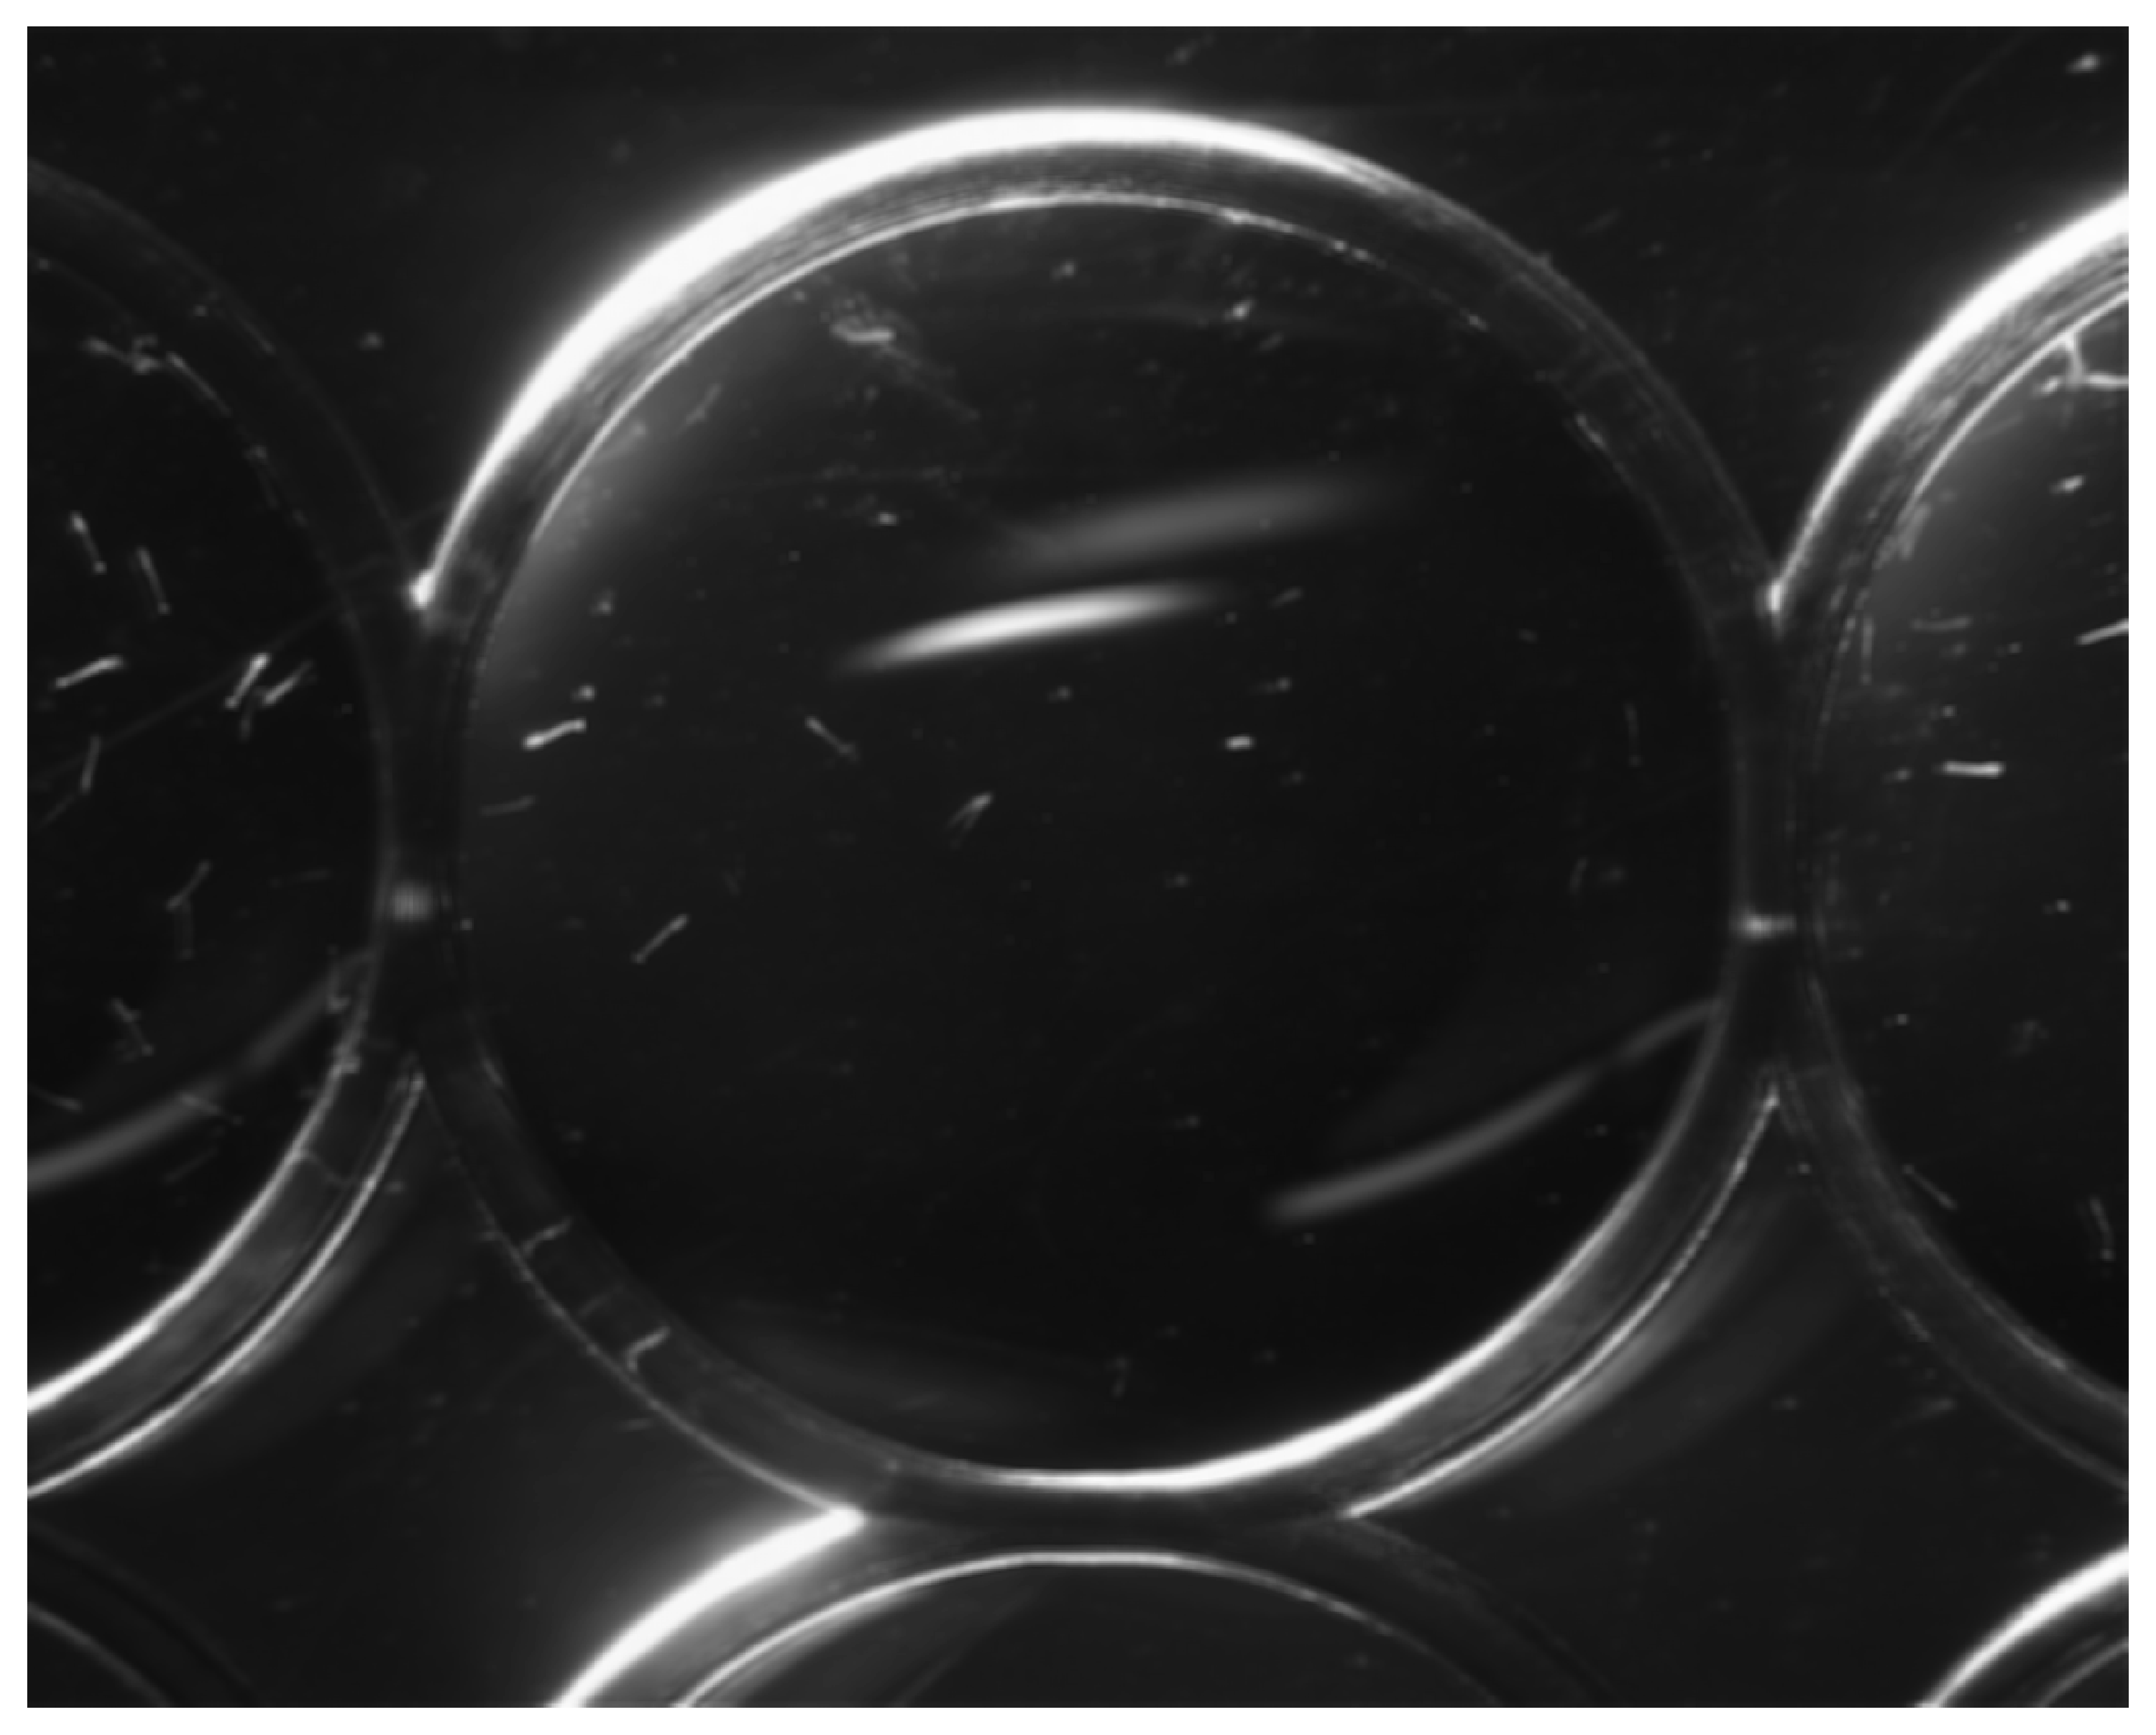

In [6]:
blurred = cv.GaussianBlur(bgnd, (7, 7), 3)
fish.show_frame(blurred)

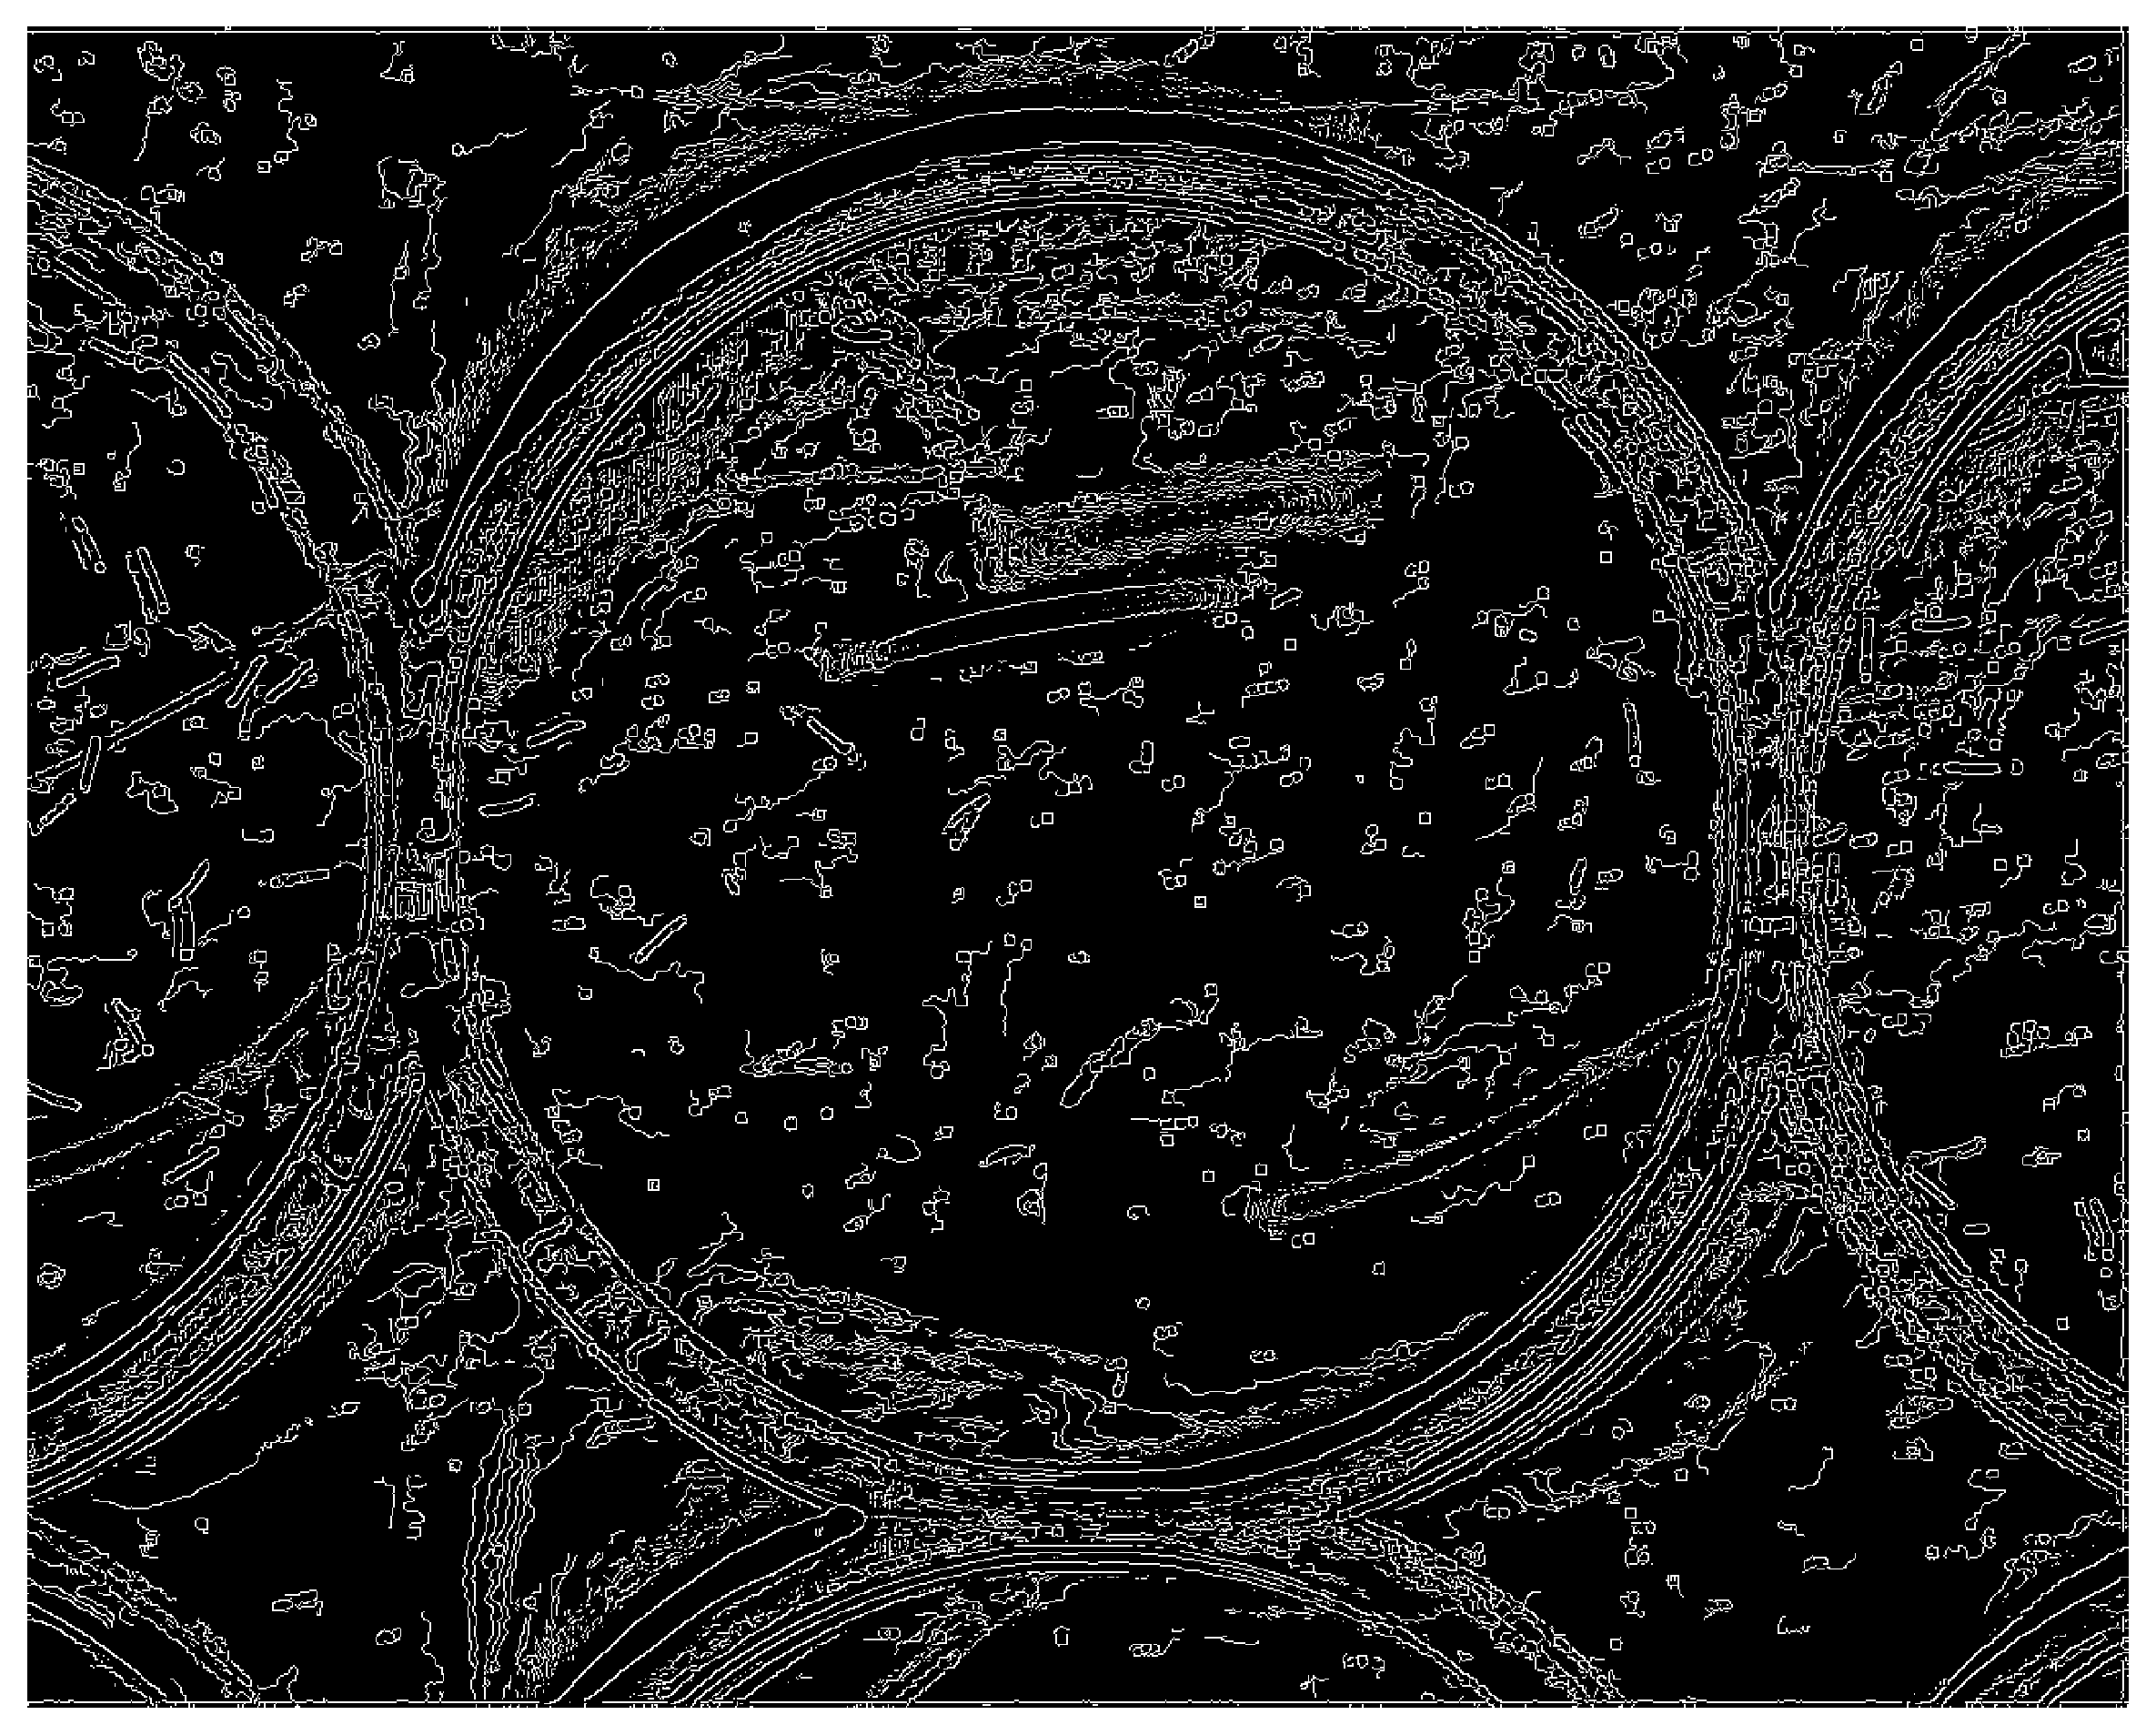

In [7]:
edges = cv.Canny(blurred, 3, 7, L2gradient = True)
fish.show_frame(edges)

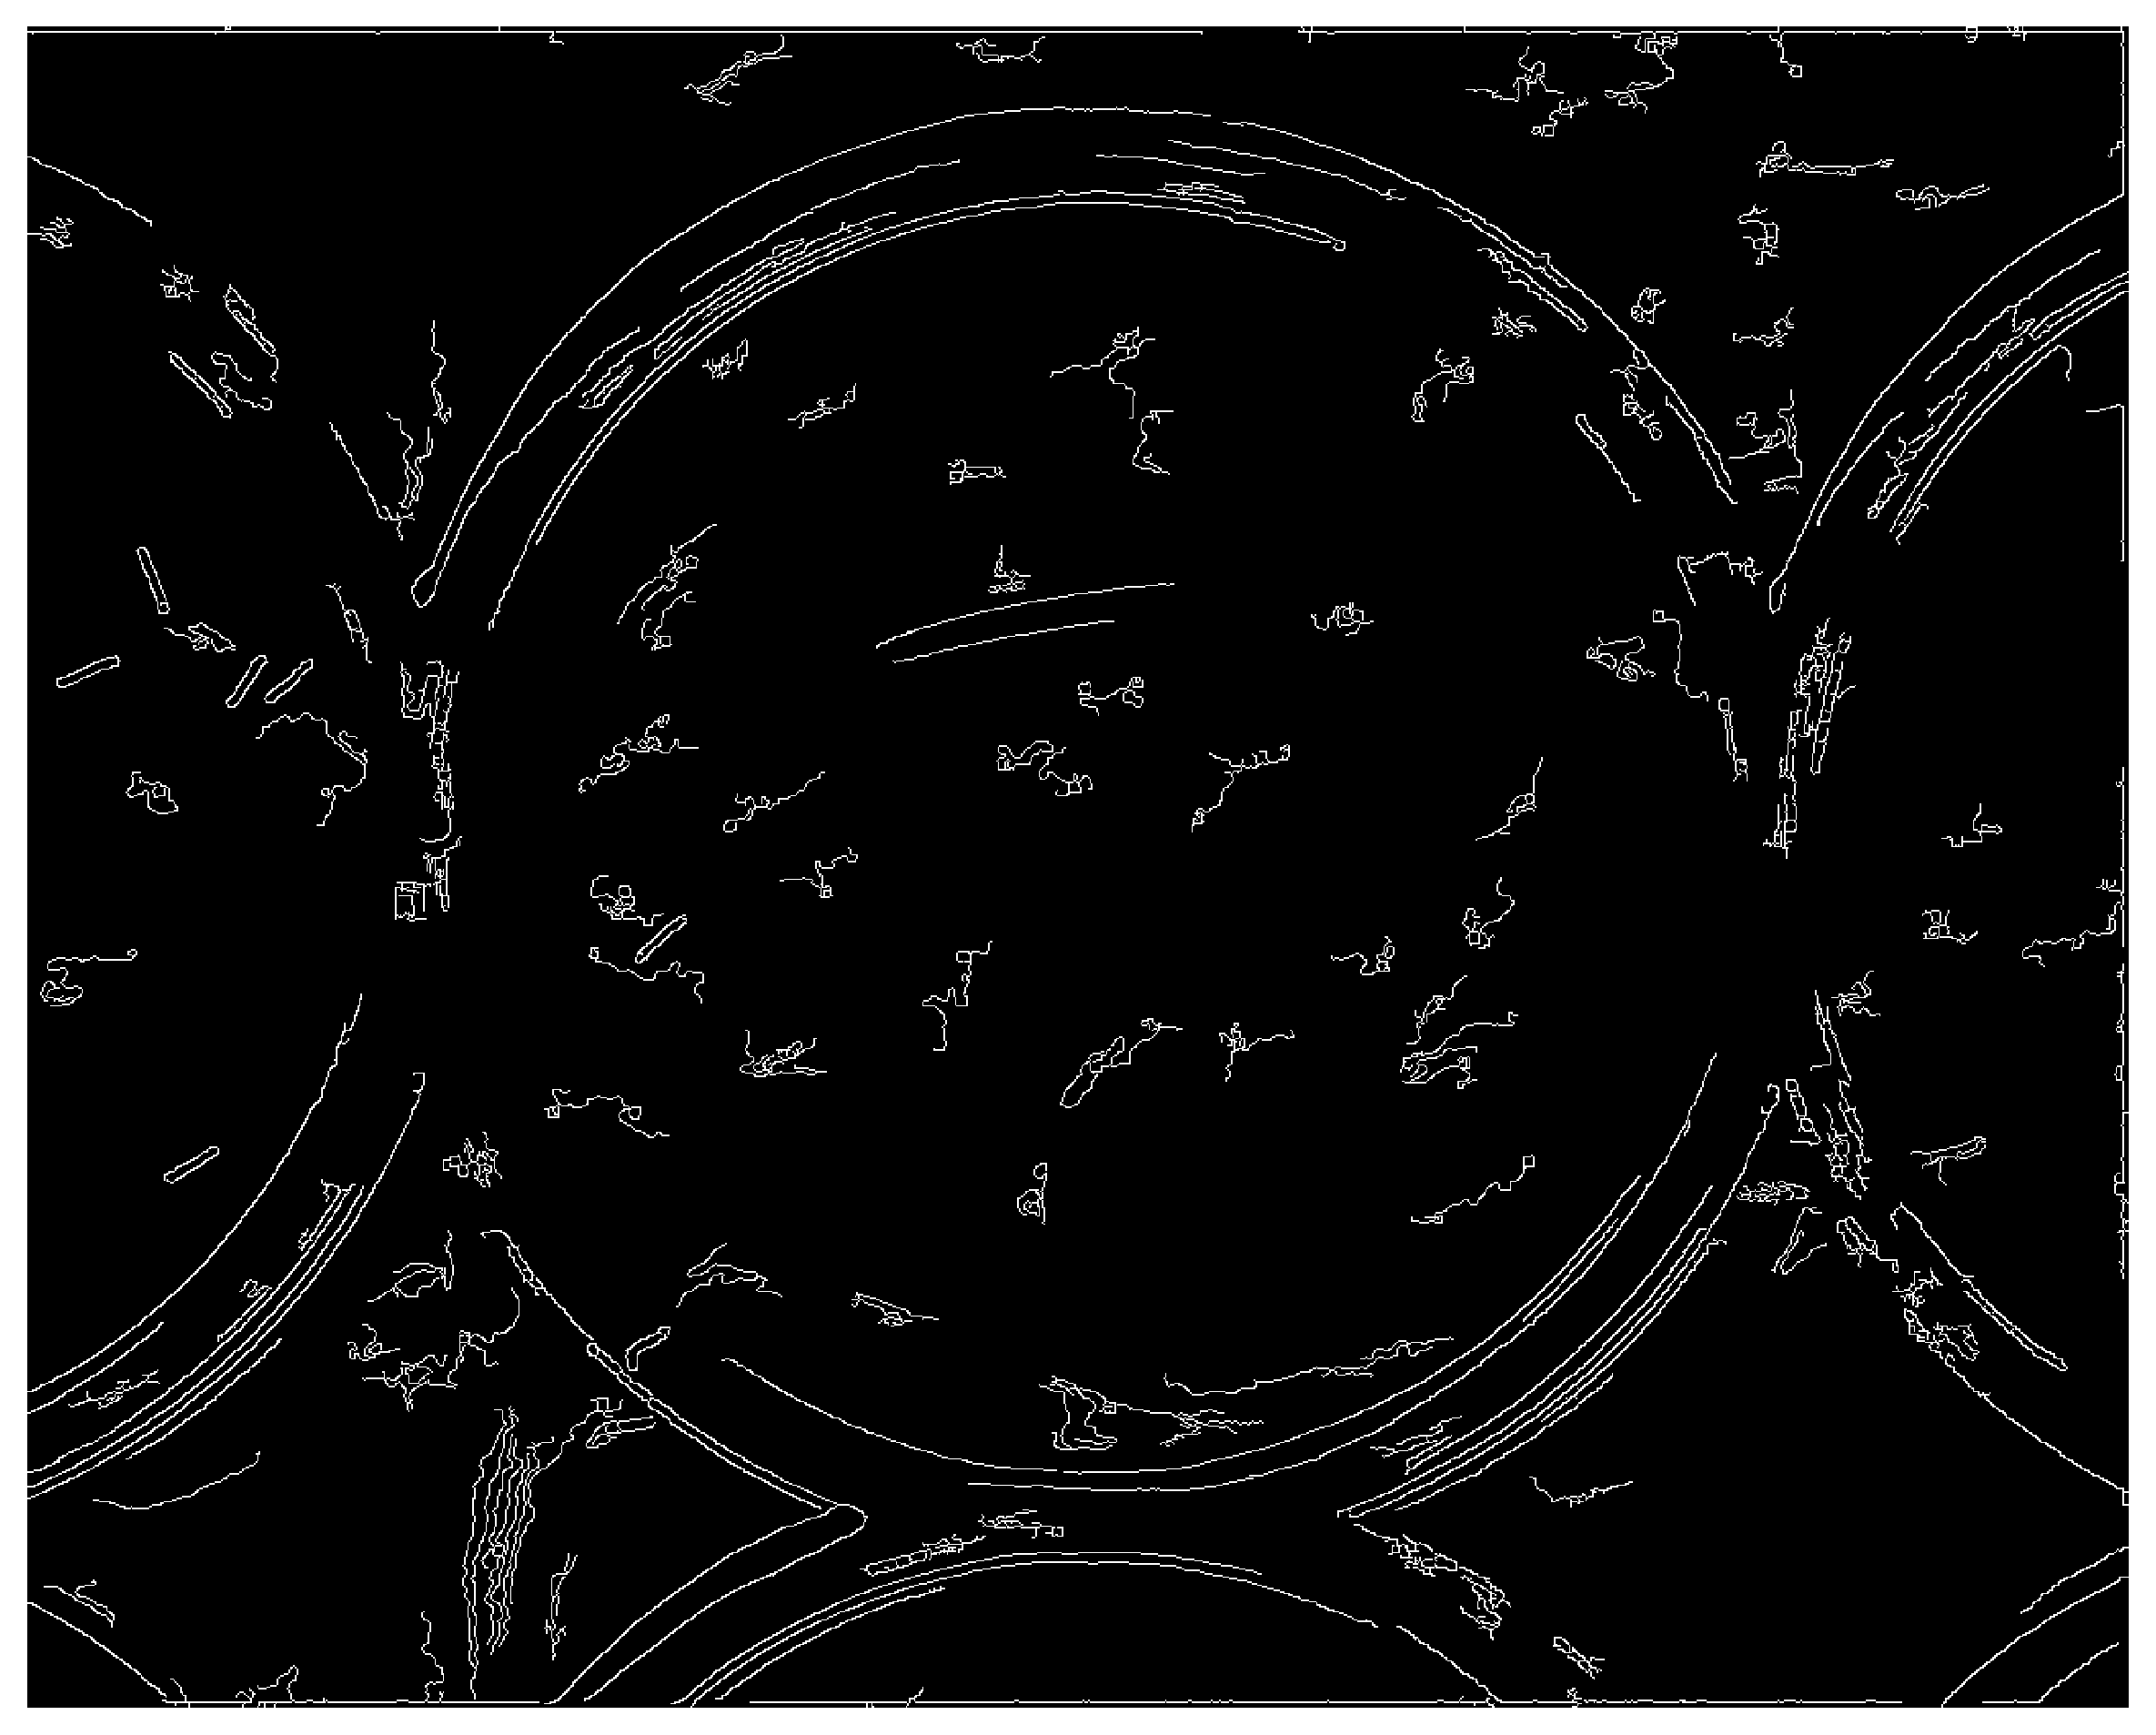

In [8]:
filtered = fish.remove_components_below_cutoff_area(edges, 100)
fish.show_frame(filtered)

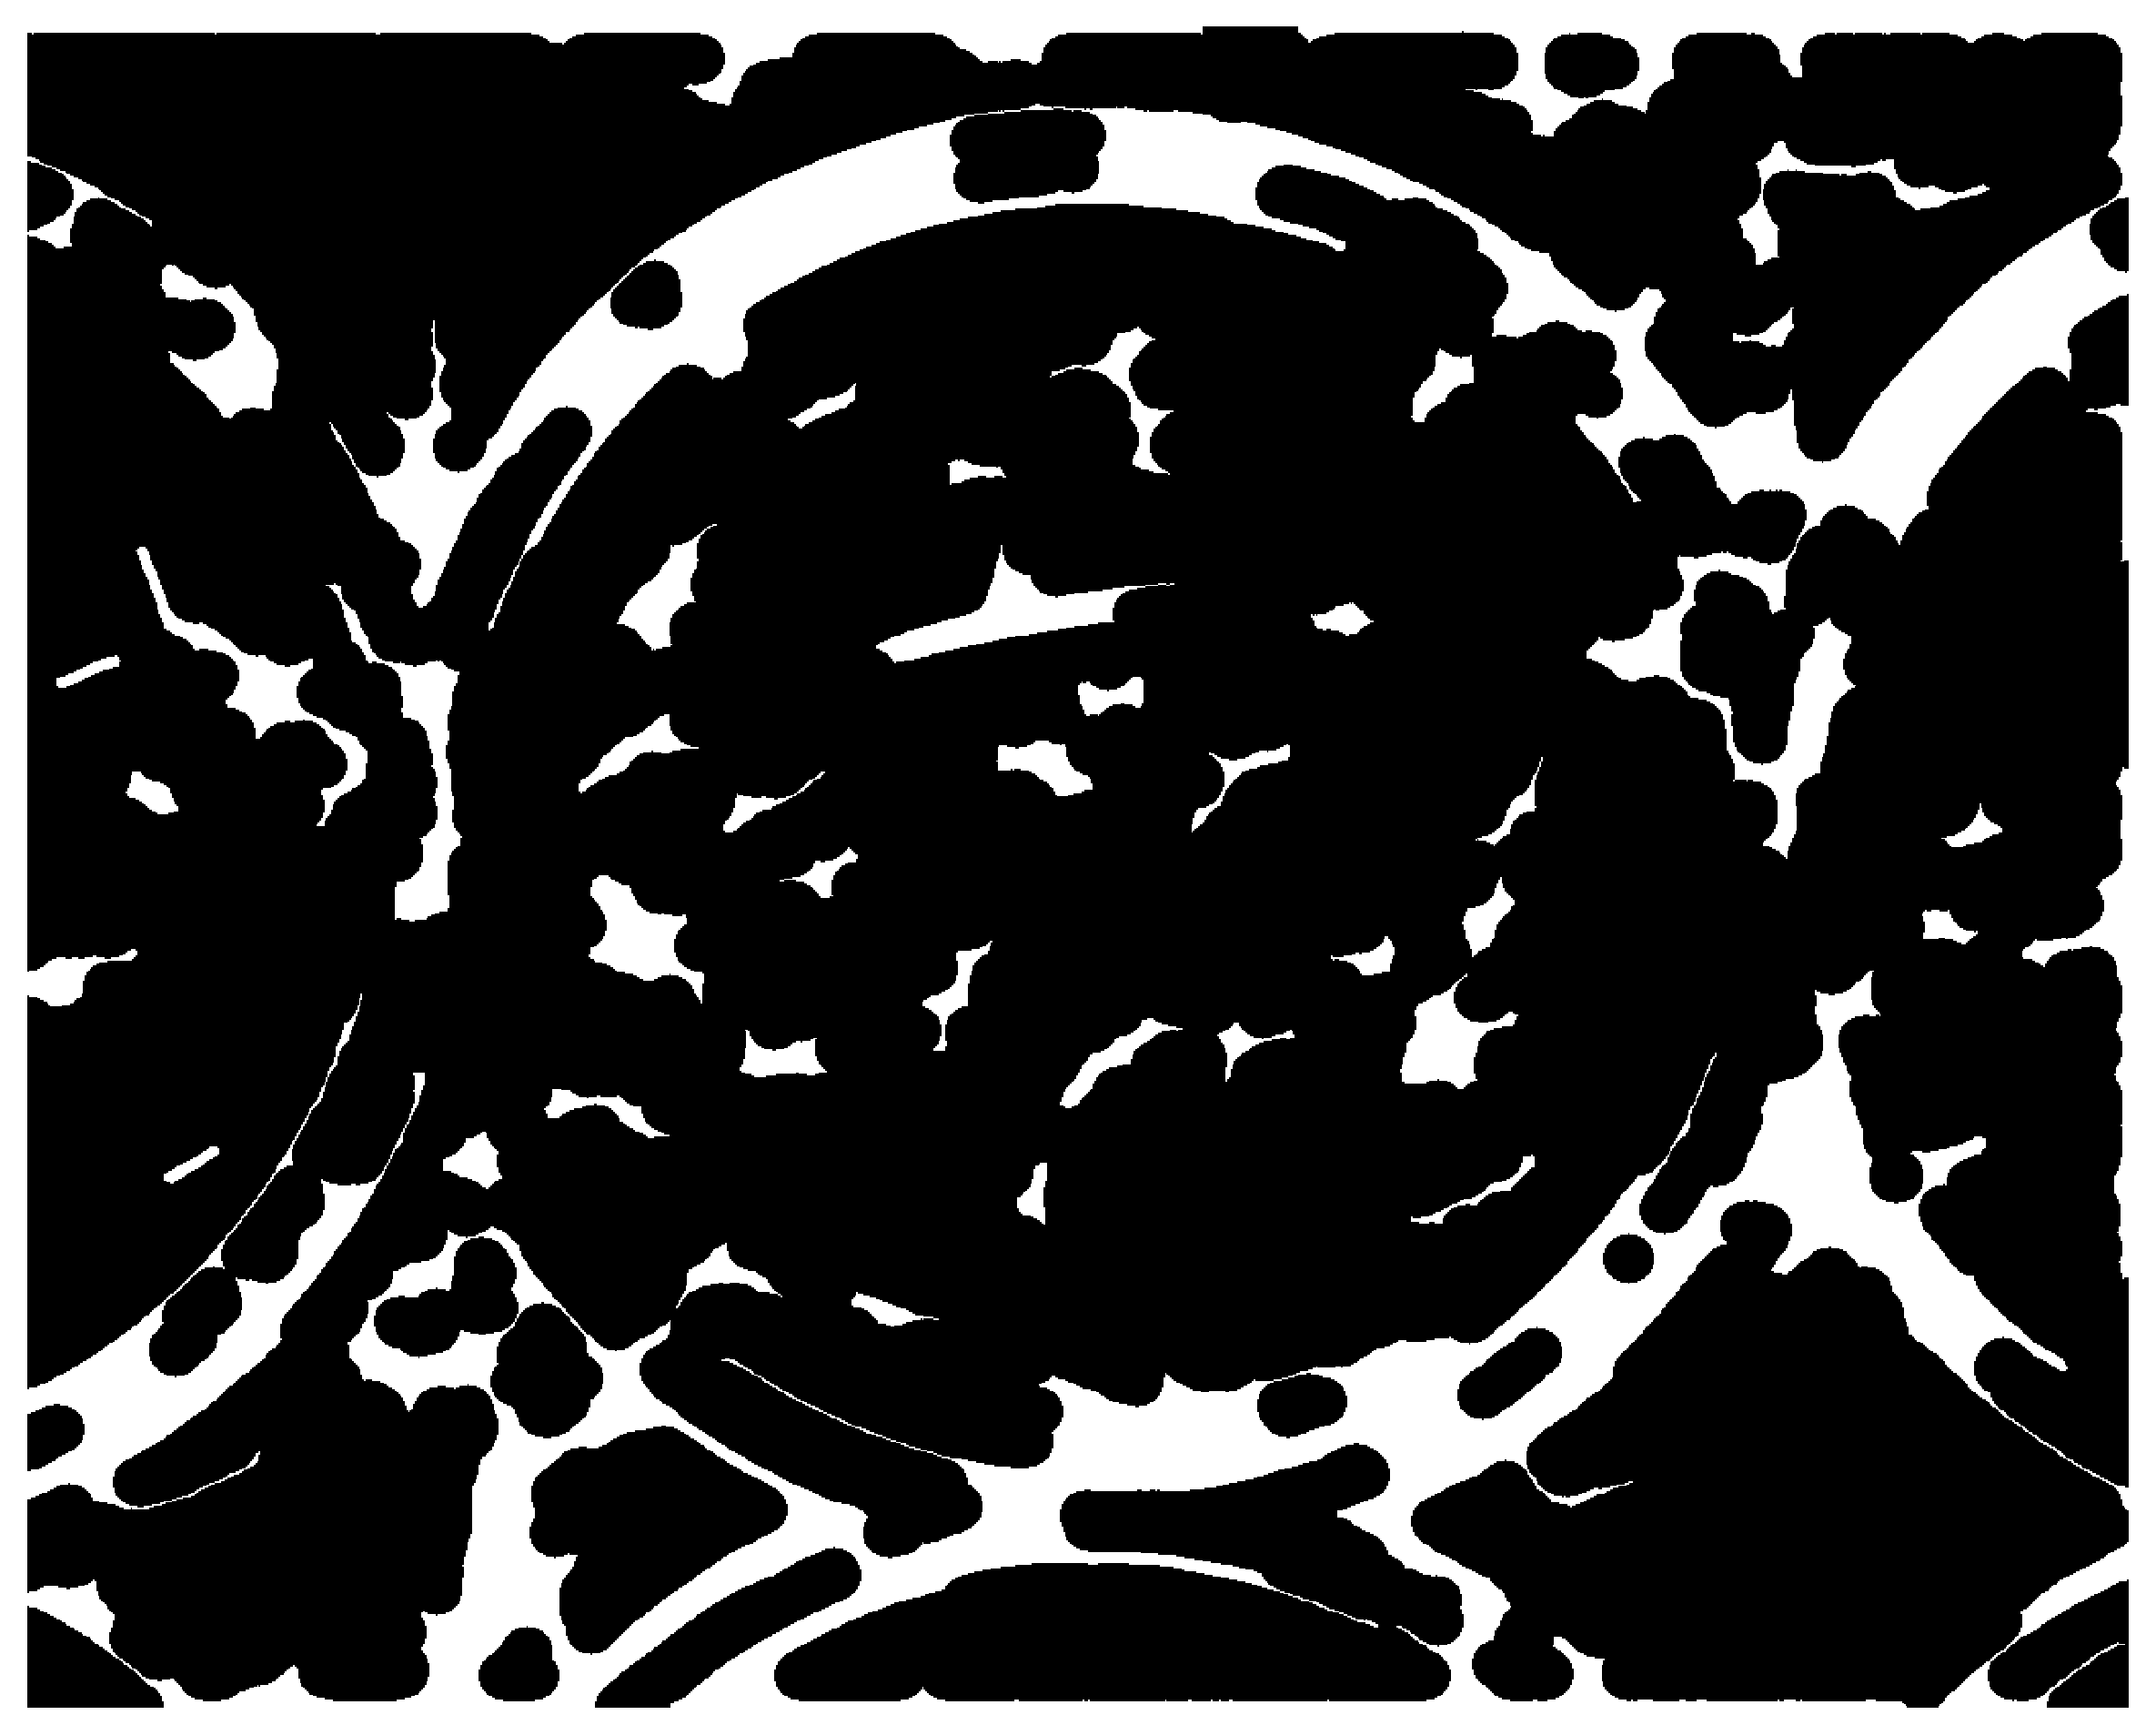

In [9]:
closed = cv.morphologyEx(filtered, cv.MORPH_CLOSE, fish.CIRCLE_CLOSING_KERNEL)
fish.show_frame(closed)

In [10]:
circles = fish.find_circles_via_hough_transform(closed)

(119, 158, 27)
(2, 95, 217)
(179, 112, 117)
(138, 41, 231)
(30, 166, 102)
(2, 171, 230)
(29, 118, 166)
(119, 158, 27)
(2, 95, 217)


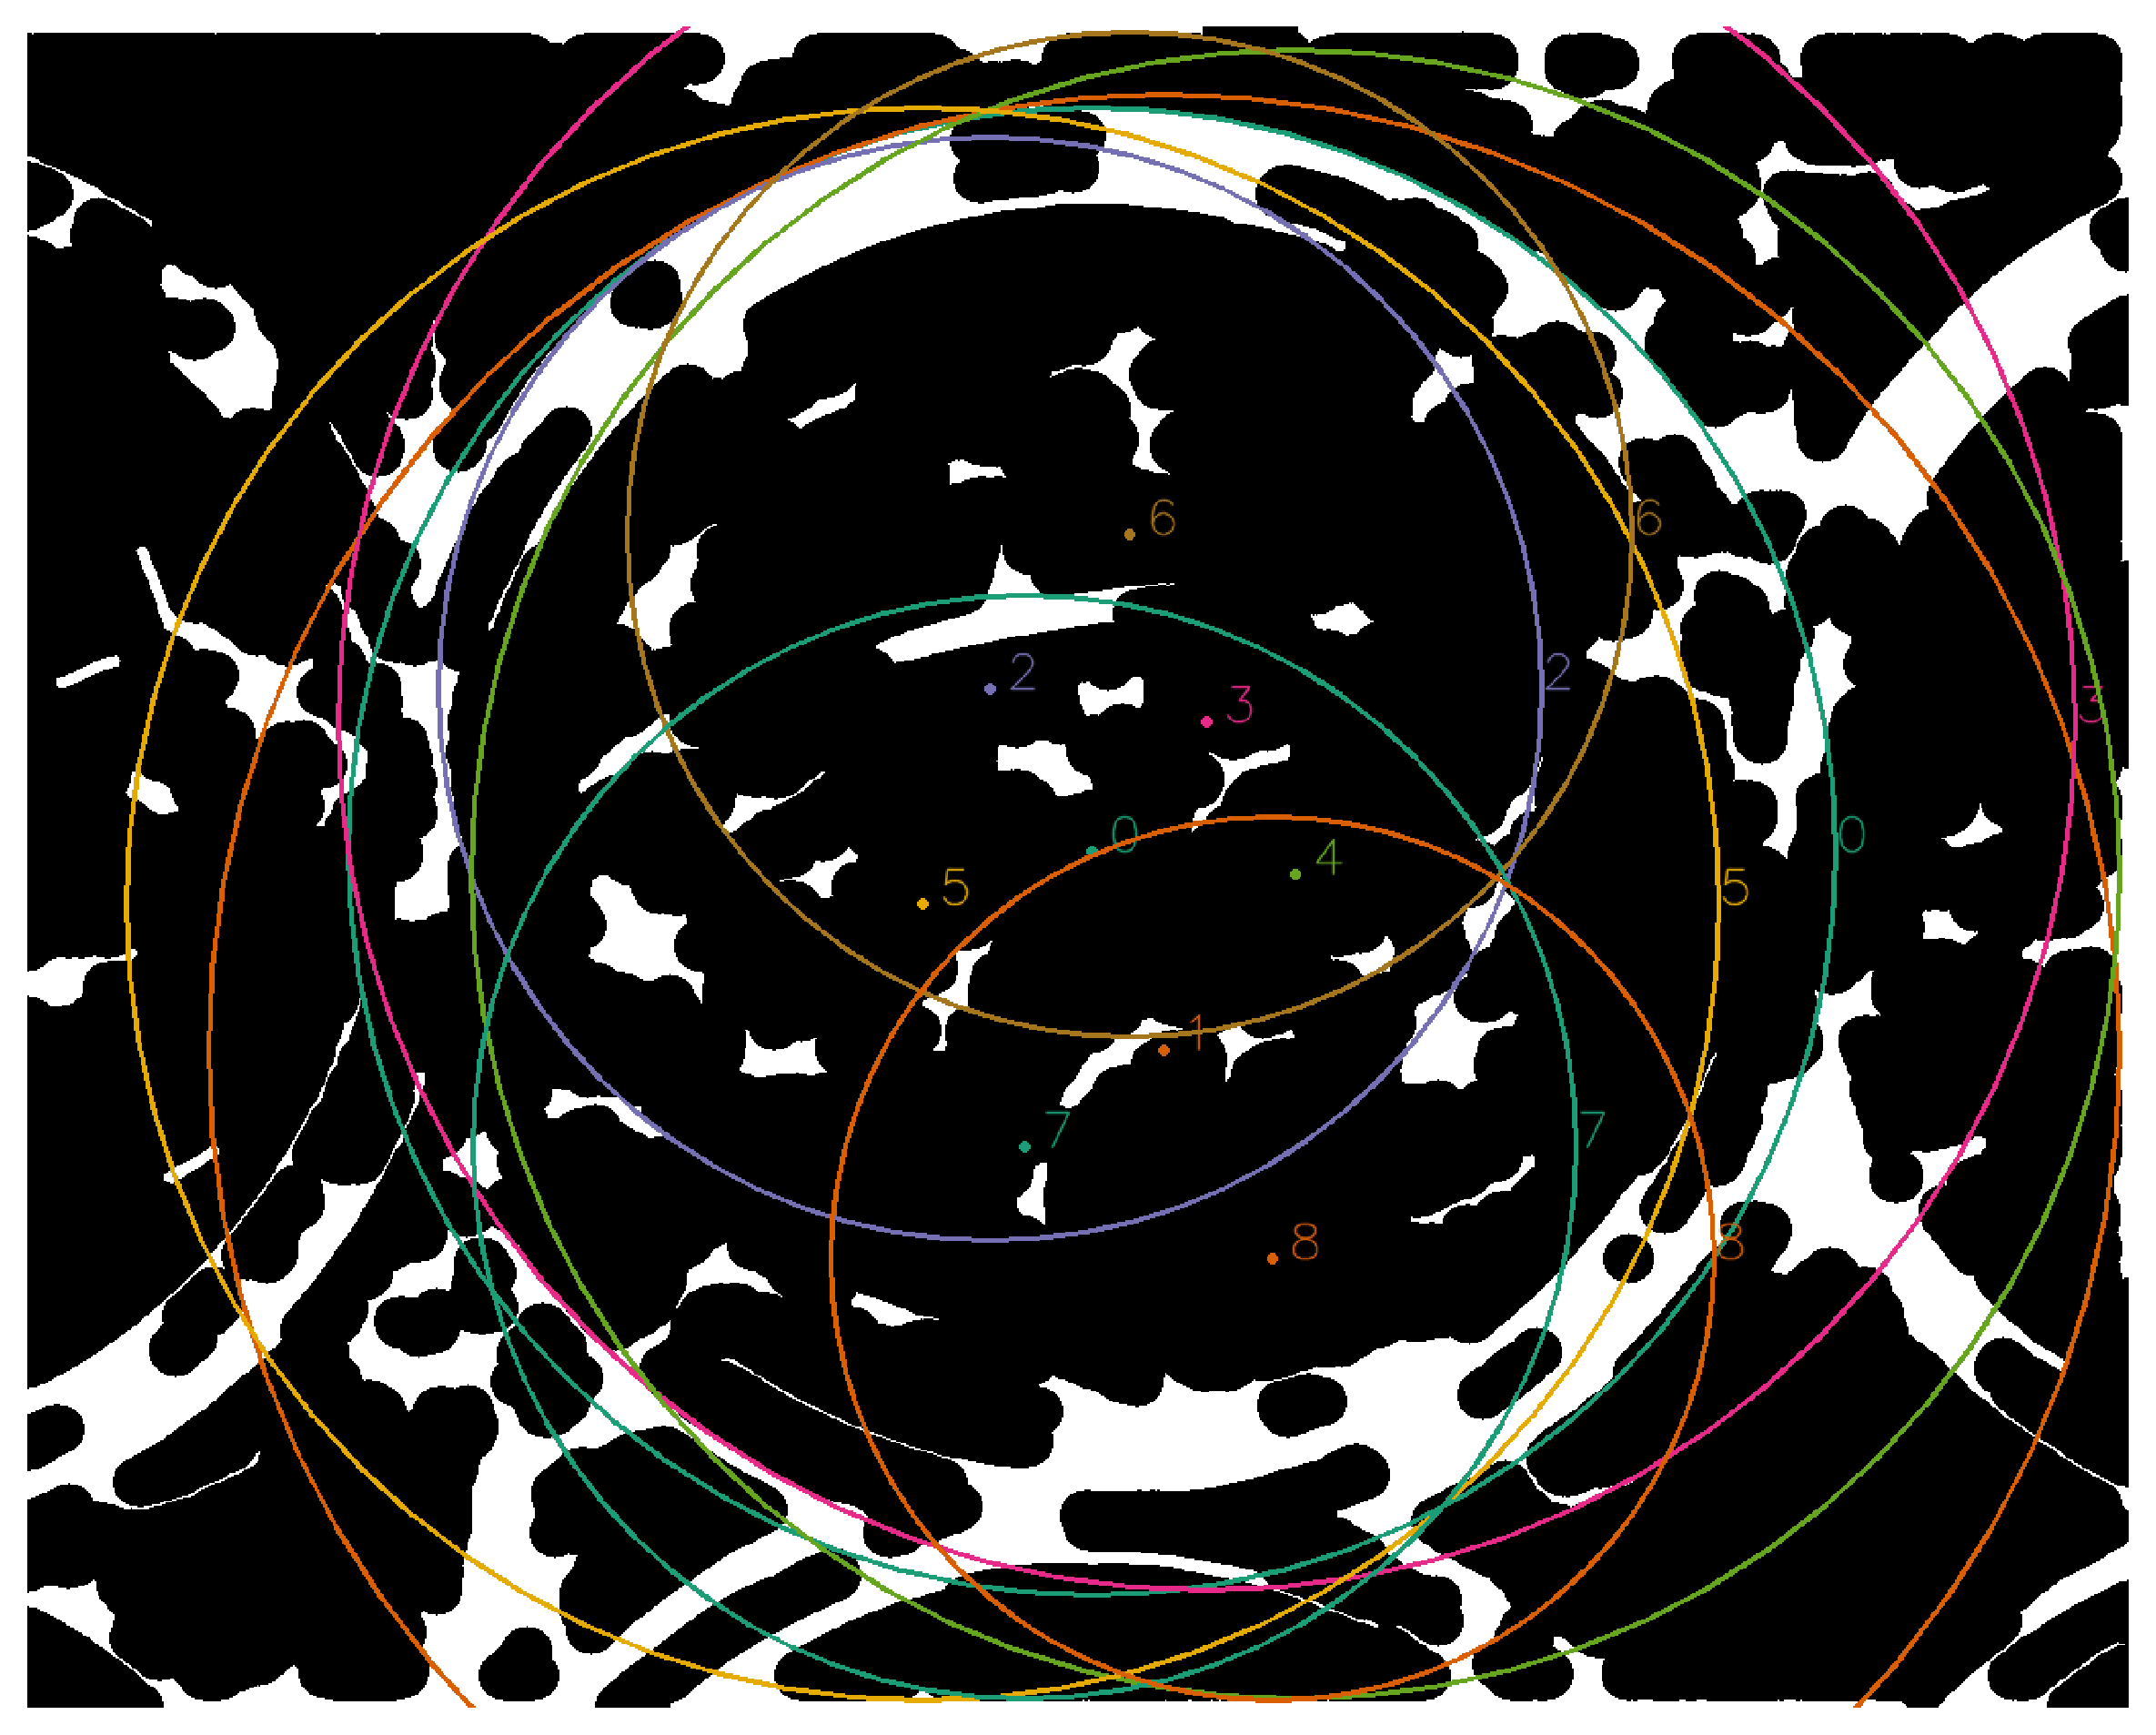

In [12]:
circled = fish.label_circles(closed, circles)
fish.show_frame(fish.bgr_to_rgb(circled))

In [ ]:
dish = fish.decide_dish(circles)
